In [49]:
import pandas as pd
import tensorflow as tf
import numpy as np
import random
from tensorflow.examples.tutorials.mnist import input_data

In [50]:
tf.set_random_seed(777)  #reproducibility

# MNIST 예제

![image](https://user-images.githubusercontent.com/51112316/60859929-44afd180-a24f-11e9-80cc-b3e926f27caf.png)

In [51]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)
#Check out https://www.tensorflow.org/get_started/mnist/beginners for more information about the mnist dataset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


#### PARAMETERS

In [52]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

#### Input place holders

In [53]:
X=tf.placeholder(tf.float32,[None, 784])
Y=tf.placeholder(tf.float32,[None, 10])

#### Weight & Bias for nn layers

In [54]:
W=tf.Variable(tf.random_normal([784,10]))
b=tf.Variable(tf.random_normal([10]))

hypothesis=tf.matmul(X,W)+b

#### Define cost / loss & optimizer

In [55]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis,labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

#### Initialize

In [56]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#### Train my model

In [57]:
for epoch in range(training_epochs):
    avg_cost=0
    total_batch=int(mnist.train.num_examples/batch_size)
    
    for i in range(total_batch):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        feed_dict = {X:batch_xs,Y:batch_ys}
        c,_=sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
        
    print('Epoch :','%04d'%(epoch+1),'cost=','{:.9f}'.format(avg_cost))
    
    print('Learning Finished')

Epoch : 0001 cost= 6.088853061
Learning Finished
Epoch : 0002 cost= 1.868360199
Learning Finished
Epoch : 0003 cost= 1.177693837
Learning Finished
Epoch : 0004 cost= 0.918648064
Learning Finished
Epoch : 0005 cost= 0.778376131
Learning Finished
Epoch : 0006 cost= 0.688701782
Learning Finished
Epoch : 0007 cost= 0.624641222
Learning Finished
Epoch : 0008 cost= 0.577444990
Learning Finished
Epoch : 0009 cost= 0.540538082
Learning Finished
Epoch : 0010 cost= 0.510936285
Learning Finished
Epoch : 0011 cost= 0.486423710
Learning Finished
Epoch : 0012 cost= 0.465768285
Learning Finished
Epoch : 0013 cost= 0.448005463
Learning Finished
Epoch : 0014 cost= 0.432682331
Learning Finished
Epoch : 0015 cost= 0.419280125
Learning Finished


#### Test model and check accuracy

In [58]:
correct_prediction = tf.equal(tf.argmax(hypothesis,1),tf.argmax(Y,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print("Accuracy :",sess.run(accuracy,feed_dict={
        X :mnist.test.images, Y:mnist.test.labels}))

Accuracy : 0.8984


#### Get one and predict

In [59]:
r=random.randint(0,mnist.test.num_examples-1)
print("Label :",sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
print("Prediction :",sess.run(tf.argmax(hypothesis,1),feed_dict={X:mnist.test.images[r:r+1]}))

Label : [1]
Prediction : [1]


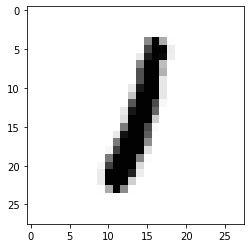

In [65]:
plt.imshow(mnist.test.images[r:r+1].reshape(28,28),cmap='Greys',interpolation='nearest')
plt.show()

# 다층 MNIST

#### Weight & Bias for nn layers

In [76]:
W1=tf.Variable(tf.random_normal([784,256]))
b1=tf.Variable(tf.random_normal([256]))
L1=tf.nn.relu(tf.matmul(X,W1)+b1)

W2=tf.Variable(tf.random_normal([256,256]))
b2=tf.Variable(tf.random_normal([256]))
L2=tf.nn.relu(tf.matmul(L1,W2)+b2)

W3=tf.Variable(tf.random_normal([256,10]))
b3=tf.Variable(tf.random_normal([10]))
L3=tf.nn.relu(tf.matmul(L2,W3)+b3)

hypothesis = tf.matmul(L2,W3)+b3

In [77]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis,labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost=0
    total_batch=int(mnist.train.num_examples/batch_size)
    
    for i in range(total_batch):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        feed_dict = {X:batch_xs,Y:batch_ys}
        c,_=sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
        
    print('Epoch :','%04d'%(epoch+1),'cost=','{:.9f}'.format(avg_cost))
    
    print('Learning Finished')

Epoch : 0001 cost= 192.608618383
Learning Finished
Epoch : 0002 cost= 44.224773736
Learning Finished
Epoch : 0003 cost= 27.736104823
Learning Finished
Epoch : 0004 cost= 19.279365433
Learning Finished
Epoch : 0005 cost= 13.968677909
Learning Finished
Epoch : 0006 cost= 10.284740440
Learning Finished
Epoch : 0007 cost= 7.661934150
Learning Finished
Epoch : 0008 cost= 5.701313848
Learning Finished
Epoch : 0009 cost= 4.252432403
Learning Finished
Epoch : 0010 cost= 3.171252094
Learning Finished
Epoch : 0011 cost= 2.388703500
Learning Finished
Epoch : 0012 cost= 1.774579248
Learning Finished
Epoch : 0013 cost= 1.362722964
Learning Finished
Epoch : 0014 cost= 0.955317123
Learning Finished
Epoch : 0015 cost= 0.844682856
Learning Finished


#### 단일층과 비교하여 Epoch 횟수가 늘어날수록 cost 값이 줄어드는 비율이 엄청 크다.

In [78]:
correct_prediction = tf.equal(tf.argmax(hypothesis,1),tf.argmax(Y,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print("Accuracy :",sess.run(accuracy,feed_dict={
        X :mnist.test.images, Y:mnist.test.labels}))

Accuracy : 0.9399


In [79]:
r=random.randint(0,mnist.test.num_examples-1)
print("Label :",sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
print("Prediction :",sess.run(tf.argmax(hypothesis,1),feed_dict={X:mnist.test.images[r:r+1]}))

Label : [9]
Prediction : [9]


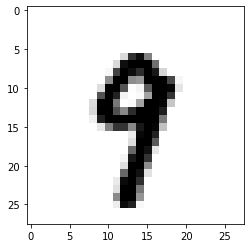

In [80]:
plt.imshow(mnist.test.images[r:r+1].reshape(28,28),cmap='Greys',interpolation='nearest')
plt.show()